In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.Db_connection import  connect_to_db

Database connected successfully


connecting to the database

In [9]:
con= connect_to_db()[0]
df_jobs= pd.read_sql_query("SELECT * FROM jobs;", con)
df_jobs.head()

Database connected successfully


/var/folders/n4/q2b10gpj67vbtksnhf6prgv00000gn/T/ipykernel_17245/4266505217.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_jobs= pd.read_sql_query("SELECT * FROM jobs;", con)


,id,title,job_id,date_posted,url,company,location,area,longitude,latitude,description
0,1,"Data Engineer, Senior",5457546102,2025-10-21,https://www.adzuna.de/details/5457546102?utm_m...,Booz Allen Hamilton,Deutschland,Deutschland,NaN,NaN,"Data Engineer, Senior\nThe Opportunity:\nAs a ..."
1,2,"Praktikant Environment, Health & Safety (m/w/d)",5457544414,2025-10-21,https://www.adzuna.de/details/5457544414?utm_m...,Magna International,"Dennheritz, Zwickau (Kreis)",Deutschland,12.460630,50.815480,"What we offer:\nAt Magna, you can expect an en..."
2,3,Intern - Data analytics in real estate investm...,5456453332,2025-10-20,https://www.adzuna.de/details/5456453332?utm_m...,PIMCO Prime Real Estate GmbH,"Altstadt-Lehel, München",Deutschland,11.569070,48.140930,Intern - Data analytics in real estate investm...
3,4,Data Science Intern (m/f/d),5455777353,2025-10-20,https://www.adzuna.de/details/5455777353?utm_m...,C&A Mode GmbH & Co. KG,"Derendorf, Düsseldorf",Deutschland,6.786820,51.243970,"THE FUTURE LOOKS LIKE YOU\nWith over 1,300 sto..."
4,5,Intern Data Management (all genders welcome),5455755593,2025-10-20,https://www.adzuna.de/details/5455755593?utm_m...,Kia Connect,"Frankfurt am Main, Hessen",Deutschland,8.650578,50.129683,Join the movement and find new inspiration.\nW...


Getting the number of mentions per skill and ranking them from the most mentioned to the least mentioned.

In [10]:
df_skills= pd.read_sql_query("SELECT skill, COUNT(skill) as count FROM skills group by skill ORDER BY count DESC LIMIT 10;", con)
df_skills.head(10)

/var/folders/n4/q2b10gpj67vbtksnhf6prgv00000gn/T/ipykernel_17245/157639332.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_skills= pd.read_sql_query("SELECT skill, COUNT(skill) as count FROM skills group by skill ORDER BY count DESC LIMIT 10;", con)


,skill,count
0,Data Analysis,24
1,Python,22
2,R,22
3,AI,16
4,Power BI,15
5,SQL,13
6,Machine Learning,13
7,Azure,10
8,Git,7
9,Excel,6


Visualizing the top 10 in-demand skills for data internships in Germany

/var/folders/n4/q2b10gpj67vbtksnhf6prgv00000gn/T/ipykernel_17245/3572307573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data=df_skills, x='skill', y='count', palette='viridis')


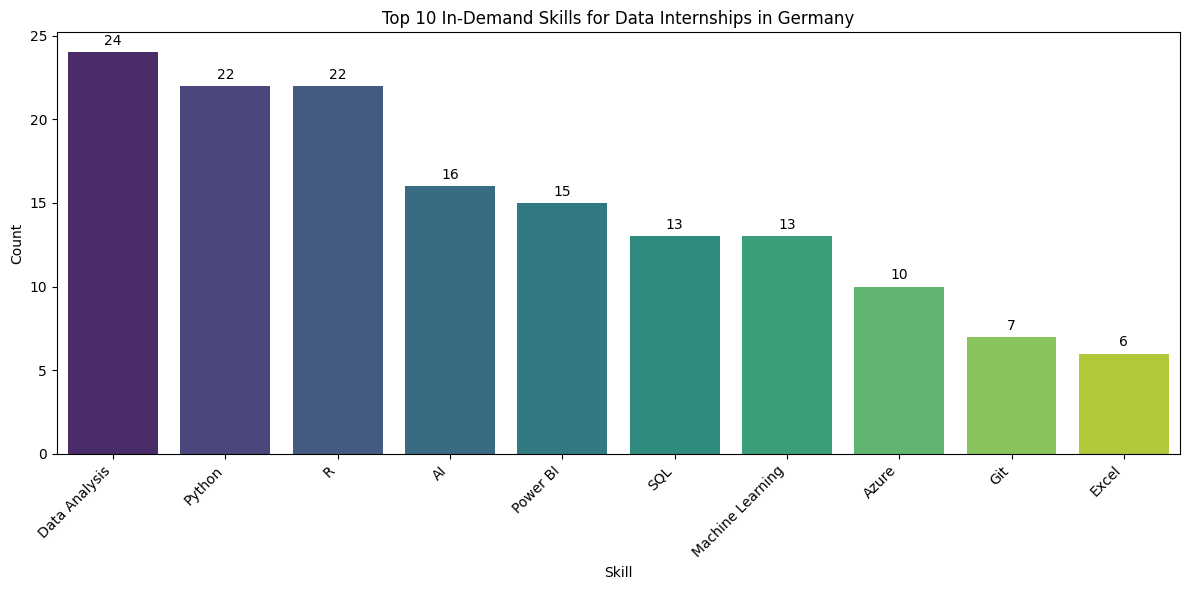

In [ ]:

plt.figure(figsize=(12, 6))
ax= sns.barplot(data=df_skills, x='skill', y='count', palette='viridis')
ax.set_title('Top 10 In-Demand Skills for Data Internships in Germany')
ax.set_xlabel('Skill')
ax.set_ylabel('Count')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Getting the companies with the most job postings

In [ ]:

df_companies= pd.read_sql_query("SELECT company, COUNT(company) as count FROM jobs group by company ORDER BY count DESC LIMIT 9;", con)
df_companies.head(10)


/var/folders/n4/q2b10gpj67vbtksnhf6prgv00000gn/T/ipykernel_17245/1309721595.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_companies= pd.read_sql_query("SELECT company, COUNT(company) as count FROM jobs group by company ORDER BY count DESC LIMIT 9;", con)


,company,count
0,Cook Group,6
1,Magna International,3
2,Procter & Gamble,3
3,"Magna International, Inc",3
4,Deichmann SE,3
5,Inter Data Systems GmbH,2
6,bei The Quality Group,2
7,PAUL HARTMANN AG,2
8,Mondelez International,2


Visualising the top companies eith the most job postings.

/var/folders/n4/q2b10gpj67vbtksnhf6prgv00000gn/T/ipykernel_17245/149377804.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data=df_companies, x='company', y='count', palette='magma')


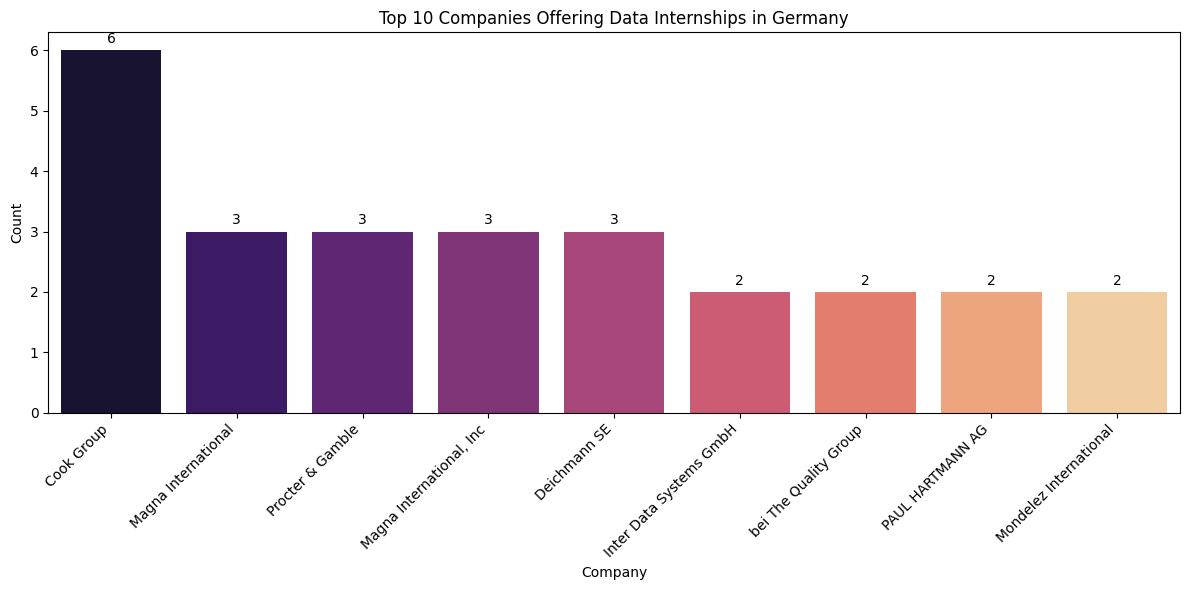

In [26]:
plt.figure(figsize=(12, 6))
ax= sns.barplot(data=df_companies, x='company', y='count', palette='magma')
ax.set_title('Top 10 Companies Offering Data Internships in Germany')
ax.set_xlabel('Company')
ax.set_ylabel('Count')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
df_skill_count=pd.read_sql('SELECT ROUND(AVG(sum))::int as avg_number_of_skills from (SELECT COUNT(skill) as sum, job_id FROM skills GROUP BY job_id);', con)
df_skill_count.head()

/var/folders/n4/q2b10gpj67vbtksnhf6prgv00000gn/T/ipykernel_17245/3632986296.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_skill_count=pd.read_sql('SELECT ROUND(AVG(sum))::int as avg_number_of_skills from (SELECT COUNT(skill) as sum, job_id FROM skills GROUP BY job_id);', con)


,avg_number_of_skills
0,6
